## Experiments with basis functions for polygons

In [42]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

%config InlineBackend.figure_format = "svg"
plt.rcParams["text.usetex"] = False # Plotting the global model is much much faster with tex fonts turned off

In [43]:
# New plan:
# - Find mesh perimeter
# + Expand mesh perimeter out using shapely
# - Overlay a uniform grid of points
# - Assign NaN to all of those outside of buffered mesh
# - Triangulate
# - Calculate smoothing matrix / del2 laplacian operator: https://www.generacodice.com/en/articolo/1033997/discrete-laplacian-(del2-equivalent)-in-python
# - Calculate n_eigs smallest eigenvalues from sparse matrix
# - Interpolate these eigenvectors onto TDE sources
# - Build decoupled checkerboard matrix
# - Solve slip coupling problem

# Bonus: Boundary conditions
# Apply exponential tapers to sides?

In [44]:
from shapely import geometry
polygon_vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
polygon = geometry.Polygon(polygon_vertices)
buffer_width = 0.25
polygon_buffer = polygon.buffer(buffer_width)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
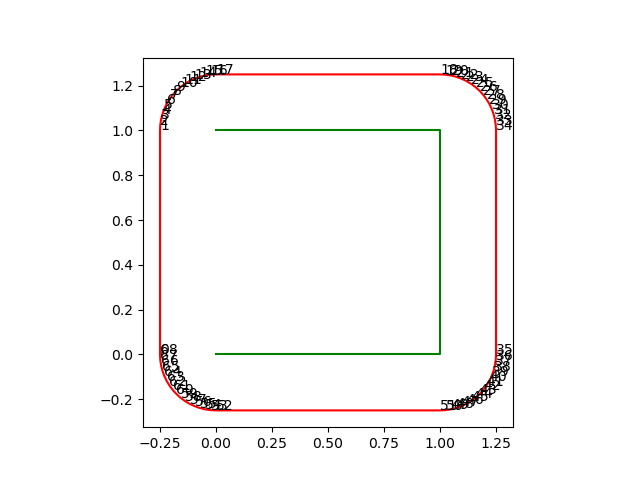

In [45]:
# Get buffer coordinates
buffer_x = np.array(polygon_buffer.boundary.xy[0])
buffer_y = np.array(polygon_buffer.boundary.xy[1])
for i in range(buffer_x.size):
    plt.text(buffer_x[i], buffer_y[i], str(i))

plt.plot(polygon_vertices[:, 0], polygon_vertices[:, 1], "-g")
plt.plot(buffer_x, buffer_y, "-r")
plt.gca().set_aspect("equal", adjustable="box")



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
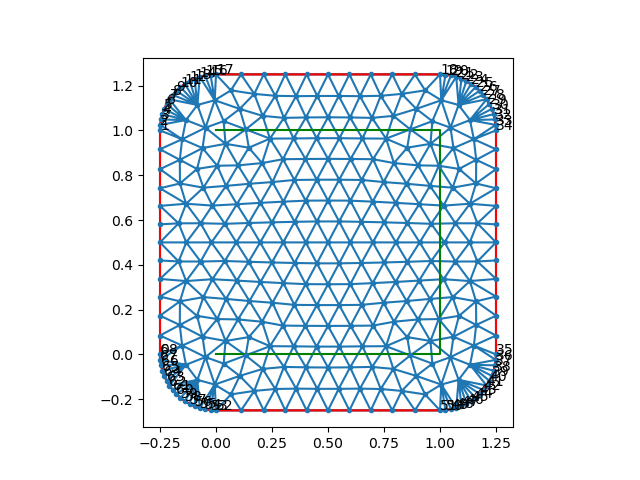

In [51]:
# Mesh polygon
import dmsh
# geo = dmsh.Polygon(
#     [
#         [0.0, 0.0],
#         [1.1, 0.0],
#         [1.2, 0.5],
#         [0.7, 0.6],
#         [2.0, 1.0],
#         [1.0, 2.0],
#         [0.5, 1.5],
#     ]
# )

geo = dmsh.Polygon(np.array([buffer_x[1::], buffer_y[1::]]).T)

X, cells = dmsh.generate(geo, 0.1)
dmsh.helpers.show(X, cells, geo)
# geo.show()

In [38]:
 a=    [
        [0.0, 0.0],
        [1.1, 0.0],
        [1.2, 0.5],
        [0.7, 0.6],
        [2.0, 1.0],
        [1.0, 2.0],
        [0.5, 1.5],
    ]

a = np.array(a)
geo = dmsh.Polygon(a)


In [39]:
a

array([[0. , 0. ],
       [1.1, 0. ],
       [1.2, 0.5],
       [0.7, 0.6],
       [2. , 1. ],
       [1. , 2. ],
       [0.5, 1.5]])

In [31]:
import numpy as np
np.array([buffer_x, buffer_y]).T

array([[-0.25      ,  0.        ],
       [-0.25      ,  1.        ],
       [-0.24879618,  1.02450429],
       [-0.24519632,  1.04877258],
       [-0.23923508,  1.07257117],
       [-0.23096988,  1.09567086],
       [-0.22048032,  1.11784918],
       [-0.2078674 ,  1.13889256],
       [-0.19325261,  1.15859832],
       [-0.1767767 ,  1.1767767 ],
       [-0.15859832,  1.19325261],
       [-0.13889256,  1.2078674 ],
       [-0.11784918,  1.22048032],
       [-0.09567086,  1.23096988],
       [-0.07257117,  1.23923508],
       [-0.04877258,  1.24519632],
       [-0.02450429,  1.24879618],
       [ 0.        ,  1.25      ],
       [ 1.        ,  1.25      ],
       [ 1.02450429,  1.24879618],
       [ 1.04877258,  1.24519632],
       [ 1.07257117,  1.23923508],
       [ 1.09567086,  1.23096988],
       [ 1.11784918,  1.22048032],
       [ 1.13889256,  1.2078674 ],
       [ 1.15859832,  1.19325261],
       [ 1.1767767 ,  1.1767767 ],
       [ 1.19325261,  1.15859832],
       [ 1.2078674 ,

In [50]:
buffer_y

array([ 0.        ,  1.        ,  1.02450429,  1.04877258,  1.07257117,
        1.09567086,  1.11784918,  1.13889256,  1.15859832,  1.1767767 ,
        1.19325261,  1.2078674 ,  1.22048032,  1.23096988,  1.23923508,
        1.24519632,  1.24879618,  1.25      ,  1.25      ,  1.24879618,
        1.24519632,  1.23923508,  1.23096988,  1.22048032,  1.2078674 ,
        1.19325261,  1.1767767 ,  1.15859832,  1.13889256,  1.11784918,
        1.09567086,  1.07257117,  1.04877258,  1.02450429,  1.        ,
        0.        , -0.02450429, -0.04877258, -0.07257117, -0.09567086,
       -0.11784918, -0.13889256, -0.15859832, -0.1767767 , -0.19325261,
       -0.2078674 , -0.22048032, -0.23096988, -0.23923508, -0.24519632,
       -0.24879618, -0.25      , -0.25      , -0.24879618, -0.24519632,
       -0.23923508, -0.23096988, -0.22048032, -0.2078674 , -0.19325261,
       -0.1767767 , -0.15859832, -0.13889256, -0.11784918, -0.09567086,
       -0.07257117, -0.04877258, -0.02450429,  0.        ])